# 1.import libraries

In [91]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

#Reading csv

In [92]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')

#General vision

In [93]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S


In [94]:
df_train.shape

(891, 12)

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
#valores duplicados
df_train.duplicated().sum()

np.int64(0)

In [97]:
#Valores nulos
df_train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [98]:
#Valores únicos
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [99]:
categoricalColumns = df_train.select_dtypes(include = ['object']).columns

for column in categoricalColumns:
    if df_train[column].nunique() <= 10:
        print(f"{column}:{df_train[column].unique()}")

Sex:['male' 'female']
Embarked:['S' 'C' 'Q' nan]


In [100]:
NumericalColumns = df_train.select_dtypes(include = ['int64', 'float64']).columns

for column in NumericalColumns:
    if df_train[column].nunique() <= 10:
        print(f"{column}:{df_train[column].unique()}")

Survived:[0 1]
Pclass:[3 1 2]
SibSp:[1 0 3 4 2 5 8]
Parch:[0 1 2 5 3 4 6]


# EDA

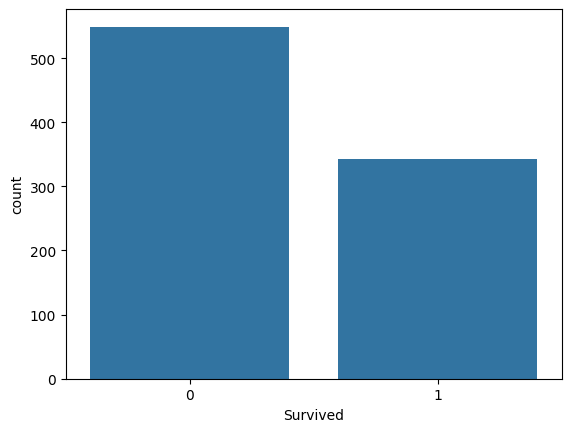

In [101]:
sns.countplot(x = 'Survived', data = df_train)
plt.show()

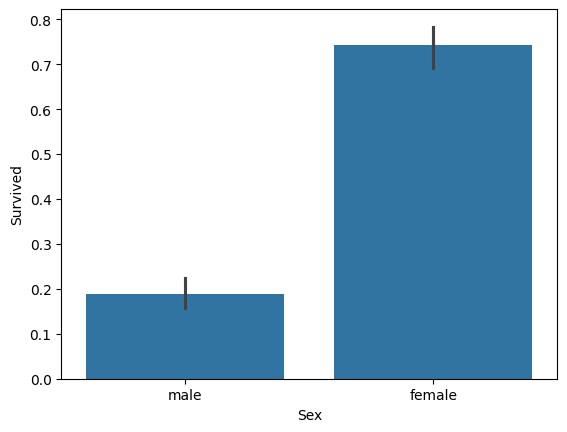

In [133]:
sns.barplot(x = 'Sex', y = 'Survived', data = df_train)
plt.show()

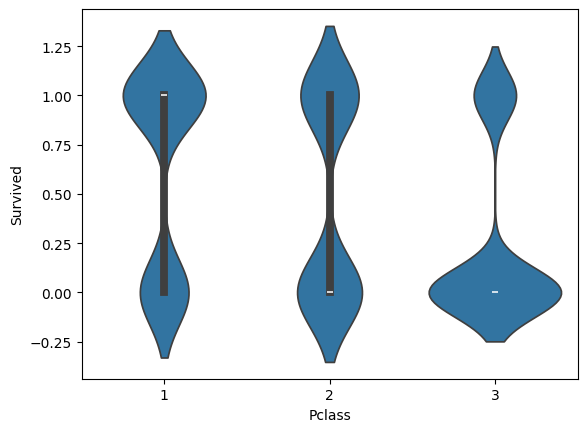

In [135]:
sns.violinplot(x = 'Pclass', y = 'Survived', data = df_train)
plt.show()

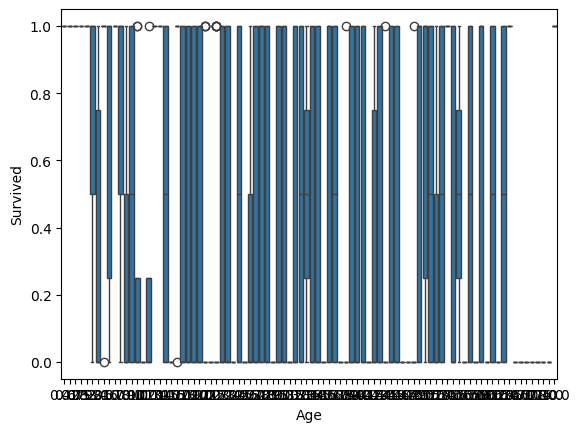

In [139]:
sns.boxplot(x = 'Age', y = 'Survived', data = df_train)
plt.show()

# Conclusions
    ##Im gonna quit cabin, fare, ticket and name

In [103]:
#df_train = df_train.drop(columns = ['PassengerId', 'Cabin', 'Fare', 'Ticket', 'Name'])
#df_test = df_test.drop(columns = ['Cabin', 'Fare', 'PassengerId', 'Ticket', 'Name'])

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preparing data

In [104]:
x = df_train.drop(columns = ['Survived']) #predict
y = df_train.Survived #target

# Cat → Num

In [105]:
a=(x.dtypes == 'object')
object_cols = list(a[a].index)

oe = OrdinalEncoder()
x[object_cols] = oe.fit_transform(x[object_cols])

In [106]:
x.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108.0,1.0,22.0,1,0,523.0,7.2500,NaN,2.0
1,2,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,3,353.0,0.0,26.0,0,0,669.0,7.9250,NaN,2.0
3,4,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,3,15.0,1.0,35.0,0,0,472.0,8.0500,NaN,2.0


# Imput for Nules

In [107]:
imput = SimpleImputer()
xTrans = pd.DataFrame(imput.fit_transform(x))
xTrans.columns = x.columns

xTrans.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Model

In [108]:
model = RandomForestClassifier()
model.fit(xTrans, y)

RandomForestClassifier()

# Predictions

In [109]:
df_test[object_cols] = oe.fit_transform(df_test[object_cols])

dfTestTrans = pd.DataFrame(imput.transform(df_test))
dfTestTrans.columns = df_test.columns

predictions = model.predict(dfTestTrans)

# Submission

In [124]:
out = pd.DataFrame({'passengerId':df_test.PassengerId,'survived':predictions})
out.to_csv('submission.csv', index = False)